### TO DO:

- Diviser le train et le test, puis le sauvegarder
- Tester plusieurs modèles en allant du plus classique au plus complexe
- Interpréter les performances et résultats de chaque modèles
- Analyse spécifique sur les résultats du molèle le plus performant (analyse post modélisation)

## Librairies

In [1]:
import pyarrow.parquet as pq
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
retreated_data = pq.read_table('../data/retreated_data.parquet')
df = retreated_data.to_pandas()

In [3]:
# Aperçu du jeu de données

pd.options.display.max_columns = None
pd.options.display.max_rows = None

df.head(10)

,coderep,montant,fraude,fm_velocity_condition_24,fm_sum_24,fm_difference_pays_24,pays_008,pays_012,pays_020,pays_028,pays_031,pays_032,pays_036,pays_040,pays_044,pays_048,pays_050,pays_051,pays_052,pays_056,pays_060,pays_068,pays_070,pays_072,pays_076,pays_084,pays_092,pays_096,pays_100,pays_112,pays_116,pays_120,pays_124,pays_136,pays_144,pays_152,pays_156,pays_158,pays_170,pays_175,pays_184,pays_188,pays_191,pays_192,pays_196,pays_203,pays_204,pays_208,pays_212,pays_214,pays_218,pays_222,pays_231,pays_233,pays_242,pays_246,pays_254,pays_258,pays_262,pays_266,pays_268,pays_275,pays_276,pays_288,pays_300,pays_308,pays_312,pays_316,pays_320,pays_324,pays_328,pays_332,pays_340,pays_344,pays_348,pays_352,pays_356,pays_360,pays_372,pays_376,pays_380,pays_384,pays_388,pays_392,pays_398,pays_400,pays_404,pays_410,pays_414,pays_418,pays_422,pays_428,pays_440,pays_442,pays_446,pays_450,pays_458,pays_462,pays_466,pays_470,pays_474,pays_480,pays_484,pays_492,pays_496,pays_498,pays_504,pays_508,pays_512,pays_524,pays_528,pays_530,pays_533,pays_540,pays_548,pays_554,pays_558,pays_578,pays_586,pays_591,pays_598,pays_600,pays_604,pays_608,pays_616,pays_620,pays_630,pays_634,pays_638,pays_642,pays_643,pays_659,pays_660,pays_662,pays_666,pays_670,pays_682,pays_686,pays_690,pays_702,pays_703,pays_704,pays_705,pays_710,pays_716,pays_724,pays_752,pays_756,pays_760,pays_764,pays_768,pays_780,pays_784,pays_788,pays_792,pays_795,pays_796,pays_804,pays_807,pays_818,pays_826,pays_834,pays_840,pays_850,pays_854,pays_858,pays_860,pays_862,pays_882,pays_891,pays_894,pays_900,mcc_0000,mcc_0001,mcc_0004,mcc_0100,mcc_0596,mcc_0741,mcc_0742,mcc_0763,mcc_0780,mcc_0799,mcc_0880,mcc_1168,mcc_1511,mcc_1520,mcc_1711,mcc_1731,mcc_1740,mcc_1750,mcc_1761,mcc_1771,mcc_1799,mcc_2020,mcc_2741,mcc_2791,mcc_2829,mcc_2842,mcc_2881,mcc_3000,mcc_3001,mcc_3005,mcc_3006,mcc_3007,mcc_3008,mcc_3009,mcc_3010,mcc_3011,mcc_3012,mcc_3013,mcc_3014,mcc_3015,mcc_3016,mcc_3017,mcc_3018,mcc_3020,mcc_3021,mcc_3022,mcc_3023,mcc_3024,mcc_3025,mcc_3026,mcc_3028,mcc_3029,mcc_3030,mcc_3031,mcc_3032,mcc_3034,mcc_3035,mcc_3036,mcc_3037,mcc_3038,mcc_3039,mcc_3040,mcc_3042,mcc_3043,mcc_3044,mcc_3047,mcc_3048,mcc_3049,mcc_3050,mcc_3051,mcc_3052,mcc_3055,mcc_3058,mcc_3059,mcc_3060,mcc_3061,mcc_3063,mcc_3064,mcc_3066,mcc_3075,mcc_3076,mcc_3077,mcc_3078,mcc_3082,mcc_3085,mcc_3088,mcc_3097,mcc_3098,mcc_3099,mcc_3100,mcc_3102,mcc_3103,mcc_3106,mcc_3111,mcc_3112,mcc_3117,mcc_3125,mcc_3127,mcc_3129,mcc_3136,mcc_3142,mcc_3144,mcc_3146,mcc_3148,mcc_3161,mcc_3167,mcc_3171,mcc_3174,mcc_3175,mcc_3177,mcc_3181,mcc_3182,mcc_3184,mcc_3185,mcc_3187,mcc_3188,mcc_3190,mcc_3192,mcc_3193,mcc_3196,mcc_3206,mcc_3217,mcc_3219,mcc_3234,mcc_3248,mcc_3251,mcc_3252,mcc_3253,mcc_3256,mcc_3259,mcc_3261,mcc_3263,mcc_3266,mcc_3287,mcc_3292,mcc_3294,mcc_3295,mcc_3297,mcc_3298,mcc_3299,mcc_3333,mcc_3351,mcc_3357,mcc_3359,mcc_3364,mcc_3366,mcc_3368,mcc_3370,mcc_3381,mcc_3387,mcc_3388,mcc_3389,mcc_3390,mcc_3393,mcc_3394,mcc_3395,mcc_3396,mcc_3405,mcc_3409,mcc_3412,mcc_3420,mcc_3434,mcc_3438,mcc_3441,mcc_3501,mcc_3502,mcc_3503,mcc_3504,mcc_3505,mcc_3506,mcc_3507,mcc_3508,mcc_3509,mcc_3510,mcc_3511,mcc_3512,mcc_3513,mcc_3514,mcc_3515,mcc_3516,mcc_3517,mcc_3518,mcc_3519,mcc_3520,mcc_3523,mcc_3524,mcc_3526,mcc_3529,mcc_3530,mcc_3533,mcc_3534,mcc_3535,mcc_3537,mcc_3538,mcc_3539,mcc_3540,mcc_3541,mcc_3542,mcc_3543,mcc_3544,mcc_3545,mcc_3548,mcc_3551,mcc_3552,mcc_3553,mcc_3555,mcc_3558,mcc_3561,mcc_3562,mcc_3563,mcc_3565,mcc_3567,mcc_3568,mcc_3569,mcc_3570,mcc_3572,mcc_3574,mcc_3575,mcc_3577,mcc_3579,mcc_3581,mcc_3583,mcc_3584,mcc_3587,mcc_3588,mcc_3590,mcc_3591,mcc_3592,mcc_3595,mcc_3598,mcc_3599,mcc_3612,mcc_3615,mcc_3623,mcc_3624,mcc_3625,mcc_3628,mcc_3629,mcc_3631,mcc_3634,mcc_3635,mcc_3637,mcc_3638,mcc_3639,mcc_3640,mcc_3641,mcc_3642,mcc_3643,mcc_3644,mcc_3645,mcc_3646,mcc_3647,mcc_3649,mcc_3650,mcc_3652,mcc_3653,mcc_3654,mcc_3655,mcc_3657,mcc_3658,mcc_3659,mcc_3661,mcc_3662,mcc_3663,mcc_3665,mcc_3667,mcc_3668,mcc_3670,mcc_3672,mcc_

## I- Séparation du jeu de données 

In [4]:
X_cols=list(df.columns)
X_cols.remove('fraude')

In [5]:
#Création d'un jeu de données d'apprentissage, de validation et de test
seed_value=45
target = df['fraude']
df1=df.copy()
df1.drop(columns=['fraude'],inplace=True)
X_train, X_test, y_train, y_test = train_test_split(df1, target,
                                                    test_size=0.3, stratify=target, random_state=seed_value)    

In [6]:
pd.DataFrame(X_train).head()

,coderep,montant,fm_velocity_condition_24,fm_sum_24,fm_difference_pays_24,pays_008,pays_012,pays_020,pays_028,pays_031,pays_032,pays_036,pays_040,pays_044,pays_048,pays_050,pays_051,pays_052,pays_056,pays_060,pays_068,pays_070,pays_072,pays_076,pays_084,pays_092,pays_096,pays_100,pays_112,pays_116,pays_120,pays_124,pays_136,pays_144,pays_152,pays_156,pays_158,pays_170,pays_175,pays_184,pays_188,pays_191,pays_192,pays_196,pays_203,pays_204,pays_208,pays_212,pays_214,pays_218,pays_222,pays_231,pays_233,pays_242,pays_246,pays_254,pays_258,pays_262,pays_266,pays_268,pays_275,pays_276,pays_288,pays_300,pays_308,pays_312,pays_316,pays_320,pays_324,pays_328,pays_332,pays_340,pays_344,pays_348,pays_352,pays_356,pays_360,pays_372,pays_376,pays_380,pays_384,pays_388,pays_392,pays_398,pays_400,pays_404,pays_410,pays_414,pays_418,pays_422,pays_428,pays_440,pays_442,pays_446,pays_450,pays_458,pays_462,pays_466,pays_470,pays_474,pays_480,pays_484,pays_492,pays_496,pays_498,pays_504,pays_508,pays_512,pays_524,pays_528,pays_530,pays_533,pays_540,pays_548,pays_554,pays_558,pays_578,pays_586,pays_591,pays_598,pays_600,pays_604,pays_608,pays_616,pays_620,pays_630,pays_634,pays_638,pays_642,pays_643,pays_659,pays_660,pays_662,pays_666,pays_670,pays_682,pays_686,pays_690,pays_702,pays_703,pays_704,pays_705,pays_710,pays_716,pays_724,pays_752,pays_756,pays_760,pays_764,pays_768,pays_780,pays_784,pays_788,pays_792,pays_795,pays_796,pays_804,pays_807,pays_818,pays_826,pays_834,pays_840,pays_850,pays_854,pays_858,pays_860,pays_862,pays_882,pays_891,pays_894,pays_900,mcc_0000,mcc_0001,mcc_0004,mcc_0100,mcc_0596,mcc_0741,mcc_0742,mcc_0763,mcc_0780,mcc_0799,mcc_0880,mcc_1168,mcc_1511,mcc_1520,mcc_1711,mcc_1731,mcc_1740,mcc_1750,mcc_1761,mcc_1771,mcc_1799,mcc_2020,mcc_2741,mcc_2791,mcc_2829,mcc_2842,mcc_2881,mcc_3000,mcc_3001,mcc_3005,mcc_3006,mcc_3007,mcc_3008,mcc_3009,mcc_3010,mcc_3011,mcc_3012,mcc_3013,mcc_3014,mcc_3015,mcc_3016,mcc_3017,mcc_3018,mcc_3020,mcc_3021,mcc_3022,mcc_3023,mcc_3024,mcc_3025,mcc_3026,mcc_3028,mcc_3029,mcc_3030,mcc_3031,mcc_3032,mcc_3034,mcc_3035,mcc_3036,mcc_3037,mcc_3038,mcc_3039,mcc_3040,mcc_3042,mcc_3043,mcc_3044,mcc_3047,mcc_3048,mcc_3049,mcc_3050,mcc_3051,mcc_3052,mcc_3055,mcc_3058,mcc_3059,mcc_3060,mcc_3061,mcc_3063,mcc_3064,mcc_3066,mcc_3075,mcc_3076,mcc_3077,mcc_3078,mcc_3082,mcc_3085,mcc_3088,mcc_3097,mcc_3098,mcc_3099,mcc_3100,mcc_3102,mcc_3103,mcc_3106,mcc_3111,mcc_3112,mcc_3117,mcc_3125,mcc_3127,mcc_3129,mcc_3136,mcc_3142,mcc_3144,mcc_3146,mcc_3148,mcc_3161,mcc_3167,mcc_3171,mcc_3174,mcc_3175,mcc_3177,mcc_3181,mcc_3182,mcc_3184,mcc_3185,mcc_3187,mcc_3188,mcc_3190,mcc_3192,mcc_3193,mcc_3196,mcc_3206,mcc_3217,mcc_3219,mcc_3234,mcc_3248,mcc_3251,mcc_3252,mcc_3253,mcc_3256,mcc_3259,mcc_3261,mcc_3263,mcc_3266,mcc_3287,mcc_3292,mcc_3294,mcc_3295,mcc_3297,mcc_3298,mcc_3299,mcc_3333,mcc_3351,mcc_3357,mcc_3359,mcc_3364,mcc_3366,mcc_3368,mcc_3370,mcc_3381,mcc_3387,mcc_3388,mcc_3389,mcc_3390,mcc_3393,mcc_3394,mcc_3395,mcc_3396,mcc_3405,mcc_3409,mcc_3412,mcc_3420,mcc_3434,mcc_3438,mcc_3441,mcc_3501,mcc_3502,mcc_3503,mcc_3504,mcc_3505,mcc_3506,mcc_3507,mcc_3508,mcc_3509,mcc_3510,mcc_3511,mcc_3512,mcc_3513,mcc_3514,mcc_3515,mcc_3516,mcc_3517,mcc_3518,mcc_3519,mcc_3520,mcc_3523,mcc_3524,mcc_3526,mcc_3529,mcc_3530,mcc_3533,mcc_3534,mcc_3535,mcc_3537,mcc_3538,mcc_3539,mcc_3540,mcc_3541,mcc_3542,mcc_3543,mcc_3544,mcc_3545,mcc_3548,mcc_3551,mcc_3552,mcc_3553,mcc_3555,mcc_3558,mcc_3561,mcc_3562,mcc_3563,mcc_3565,mcc_3567,mcc_3568,mcc_3569,mcc_3570,mcc_3572,mcc_3574,mcc_3575,mcc_3577,mcc_3579,mcc_3581,mcc_3583,mcc_3584,mcc_3587,mcc_3588,mcc_3590,mcc_3591,mcc_3592,mcc_3595,mcc_3598,mcc_3599,mcc_3612,mcc_3615,mcc_3623,mcc_3624,mcc_3625,mcc_3628,mcc_3629,mcc_3631,mcc_3634,mcc_3635,mcc_3637,mcc_3638,mcc_3639,mcc_3640,mcc_3641,mcc_3642,mcc_3643,mcc_3644,mcc_3645,mcc_3646,mcc_3647,mcc_3649,mcc_3650,mcc_3652,mcc_3653,mcc_3654,mcc_3655,mcc_3657,mcc_3658,mcc_3659,mcc_3661,mcc_3662,mcc_3663,mcc_3665,mcc_3667,mcc_3668,mcc_3670,mcc_3672,mcc_3676,mc

In [7]:
X_train.shape

(786449, 875)

In [8]:
y_train.mean()*100

0.6446699023077148

In [9]:
# Répartition de la fraude dans la base de données

print(f'Répartition variable "{"fraude"}":')
pd.DataFrame(y_train)[["fraude"]].value_counts(normalize=False)

Répartition variable "fraude":


fraude
0         781379
1           5070
dtype: int64

## II- Modélisation

### Arbre de décision

In [10]:
from sklearn.tree import DecisionTreeClassifier

# Dans notre cas un arbre, où l'utilisateur a fixé les paramètres  criterion, splitter, max_depth
# Quels paramètres ?????????????


tree = DecisionTreeClassifier(criterion = 'gini', splitter ='best',max_depth=4) 

# Apprentissage du modèle
tree.fit(X_train,y_train)
print(tree)

DecisionTreeClassifier(max_depth=4)


In [11]:
# Résultats : prédiction du modèle, si proba >=0.5 prediction = 1 ou 0

y_train_predict = tree.predict(X_train)
print("Vecteur de prédiction :")
pd.DataFrame(y_train_predict).head()

Vecteur de prédiction :


,0
0,0
1,0
2,0
3,0
4,0


In [12]:
y_test_predict = tree.predict(X_test)

In [13]:
# Calcul des probabilités prédites 

print("\n Probabilités :")
print(tree.predict_proba(X_train))


 Probabilités :
[[0.99679907 0.00320093]
 [0.99679907 0.00320093]
 [0.99119745 0.00880255]
 ...
 [0.98072353 0.01927647]
 [0.99679907 0.00320093]
 [0.99679907 0.00320093]]


In [14]:
# Enregistrement en mémoire la probabilité de l'événement cible

y_train_predict_proba = tree.predict_proba(X_train)[:,1]
print("\n Vecteur de probabilité de l'événement cible")
print(y_train_predict_proba)
y_test_predict_proba = tree.predict_proba(X_test)[:,1]


 Vecteur de probabilité de l'événement cible
[0.00320093 0.00320093 0.00880255 ... 0.01927647 0.00320093 0.00320093]


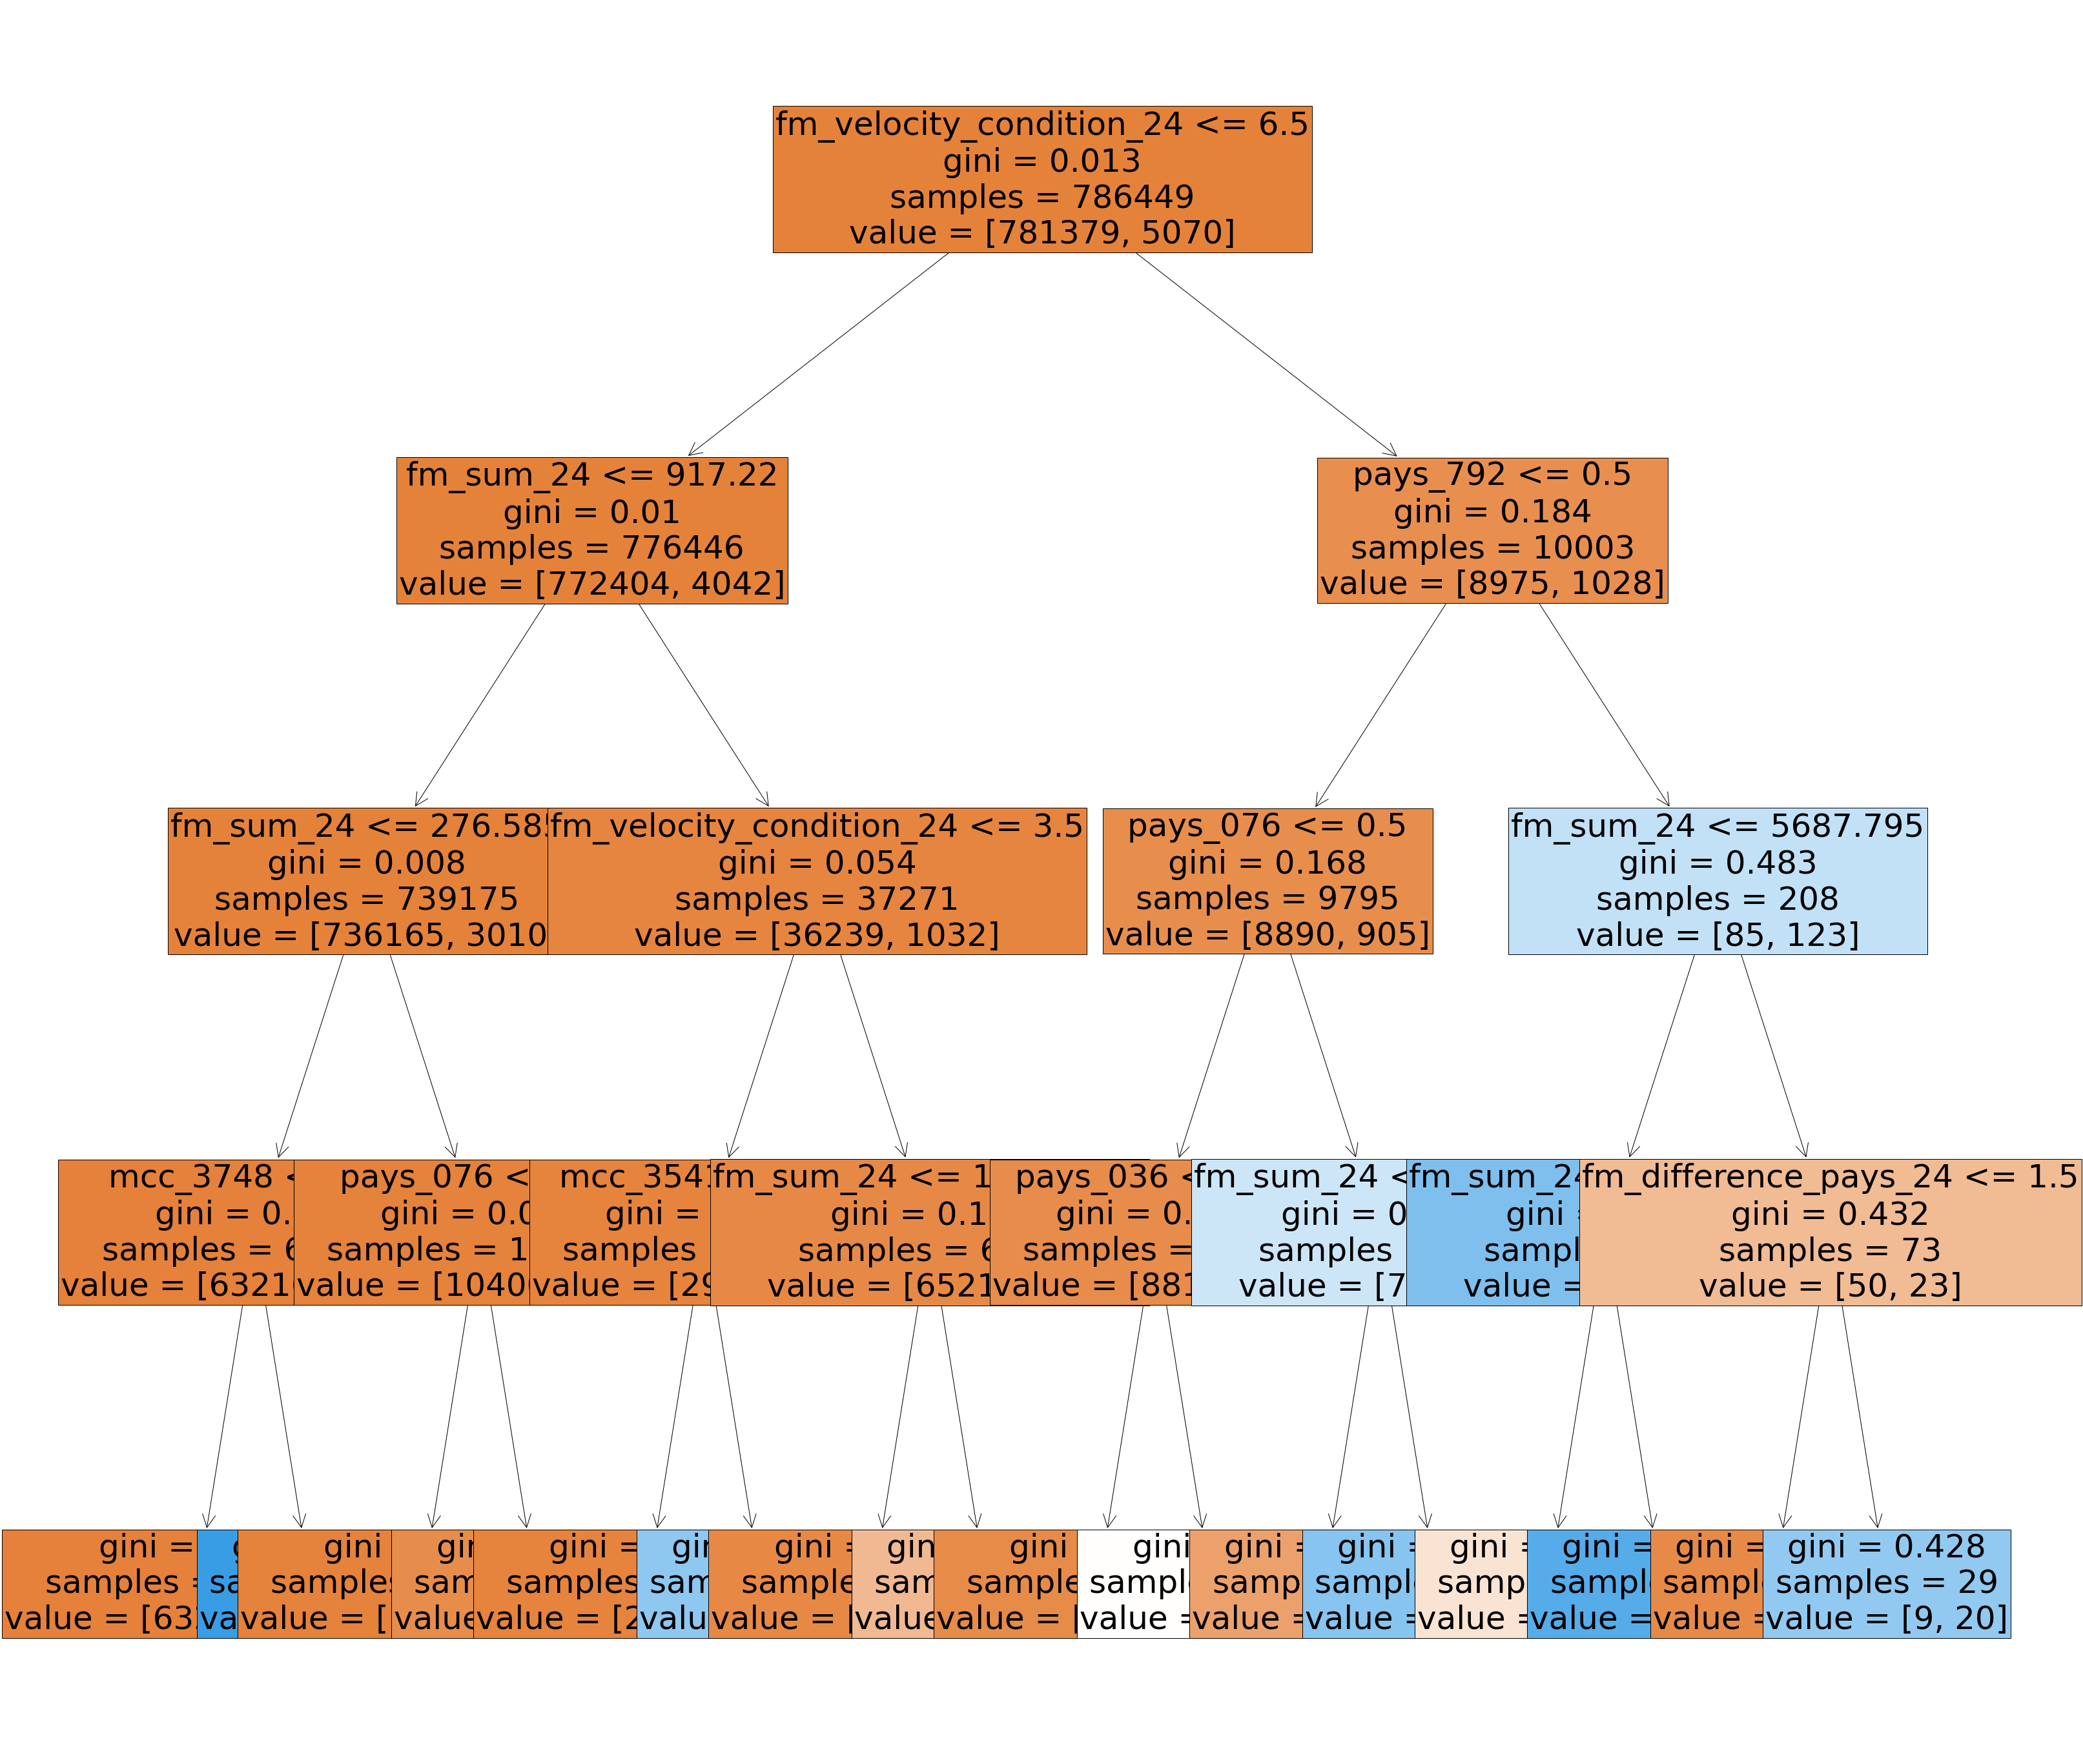

In [15]:
#Affichage de l'abre de décision

from sklearn.tree import plot_tree
plt.figure(figsize=(50,50))
plot_tree(tree, feature_names = X_cols, filled = True, max_depth=4, fontsize=50)
plt.show()

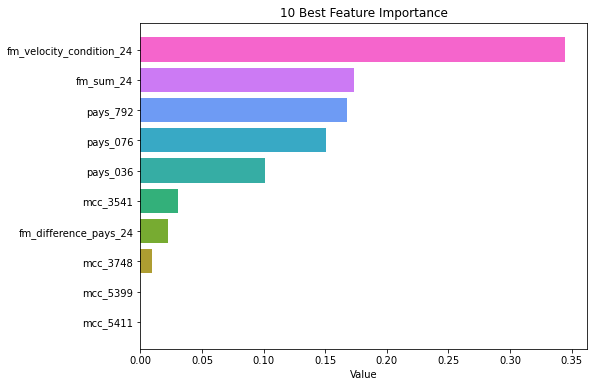

In [16]:
# Importance des variables
importance_variable = pd.DataFrame()
importance_variable["Variable"]= X_cols
importance_variable["Feature Importance"] = tree.feature_importances_
importance_variable.sort_values(by = "Feature Importance", axis=0, ascending=False, inplace=True)

filter_importance_variable =  importance_variable.iloc[0:10]

# Utiliser une palette de couleurs Seaborn
colors = sns.color_palette("husl", len(filter_importance_variable['Variable']))

feature_importance = filter_importance_variable['Feature Importance']

# Trier les coefficients par magnitude croissante
sorted_indices = np.argsort(np.abs(feature_importance))  # Indices triés par magnitude croissante
sorted_importance = filter_importance_variable.iloc[sorted_indices]['Feature Importance']
sorted_variable_names = filter_importance_variable.iloc[sorted_indices]['Variable']

plt.figure(figsize=(8,6))

# Créer un graphique de barres avec des couleurs personnalisées
plt.barh(sorted_variable_names, sorted_importance, color=colors)
plt.title("10 Best Feature Importance")
plt.xlabel("Value")

plt.show()

### Evaluation des performances du modèle 

#### Courbe ROC et calcul de l'AUC

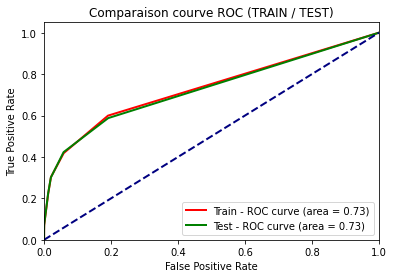

In [17]:
# Creation des courbes ROC

from sklearn.metrics import roc_curve, auc
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_predict_proba)
roc_auc_train = auc(fpr_train, tpr_train)
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_predict_proba)
roc_auc_test = auc(fpr_test, tpr_test)

# Représentation graphique / courbe ROC

import matplotlib.pyplot as plt
plt.figure()
lw = 2
plt.plot(fpr_train, tpr_train, color='red',
         lw=lw, label='Train - ROC curve (area = %0.2f)' % roc_auc_train)

plt.plot(fpr_test, tpr_test, color='green',
         lw=lw, label='Test - ROC curve (area = %0.2f)' % roc_auc_test)

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Comparaison courve ROC (TRAIN / TEST)')
plt.legend(loc="lower right")
plt.show()


#### Calcul de la logloss

In [18]:
from sklearn.metrics import log_loss
print("log loss app : " + str(log_loss(y_train, y_train_predict_proba)))
print("log loss test : " + str(log_loss(y_test, y_test_predict_proba)))

log loss app : 0.03368672826198252
log loss test : 0.03379723066853631


#### Recall et precision test

In [19]:
# Matrice de confusion
from sklearn.metrics import confusion_matrix
Confusion_matrix_app = confusion_matrix(y_train, y_train_predict)
Confusion_matrix_test= confusion_matrix(y_test, y_test_predict)
print(Confusion_matrix_app)
print(Confusion_matrix_test)

[[781316     63]
 [  4860    210]]
[[334853     24]
 [  2072    101]]


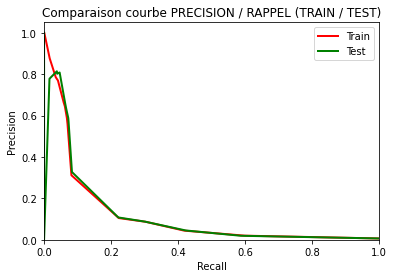

In [20]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
precision_train, recall_train, thresholds_train = precision_recall_curve(y_train,
                                                                         y_train_predict_proba)
precision_test, recall_test, thresholds_test = precision_recall_curve(y_test, 
                                                                      y_test_predict_proba)
plt.figure()
lw = 2
plt.plot(recall_train,precision_train, color='red',
         lw=lw, label='Train')

plt.plot(recall_test,precision_test, color='green',
         lw=lw, label='Test')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Comparaison courbe PRECISION / RAPPEL (TRAIN / TEST)')
plt.legend(loc="upper right")
plt.show()

In [21]:
# Choix du seuil

table_choix_seuil = pd.DataFrame()
table_choix_seuil["SEUIL"] = [0] + list(thresholds_train)
table_choix_seuil["Precision_train"] = precision_train
table_choix_seuil["Recall_train"] = recall_train
table_choix_seuil.sort_values(by = "SEUIL", axis=0, ascending=False, inplace=True)
print(table_choix_seuil)

       SEUIL  Precision_train  Recall_train
16  1.000000         1.000000      0.000000
15  0.872340         1.000000      0.000592
14  0.716535         0.876289      0.016765
13  0.700000         0.785714      0.034714
12  0.689655         0.778689      0.037475
11  0.497143         0.769231      0.041420
10  0.439024         0.662946      0.058580
9   0.309278         0.644172      0.062130
8   0.204082         0.588737      0.068047
7   0.085137         0.559055      0.070020
6   0.075921         0.311747      0.081657
5   0.068182         0.104994      0.223077
4   0.058909         0.104845      0.223669
3   0.019276         0.087020      0.303353
2   0.008803         0.044236      0.418540
1   0.003201         0.019966      0.599606
0   0.000000         0.006447      1.000000


In [22]:
# Application du seuil selectionner au jeu d'apprentissage
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

seuil = 0.87235
y_train_predict_seuil = (y_train_predict_proba>seuil)*1

print("Metrique pour le jeu de données train : ")
print("\n Recall : " + str(recall_score(y_train, y_train_predict_seuil)))

print("\n Précision : " + str(precision_score(y_train, y_train_predict_seuil)))
Confusion_matrix_app = confusion_matrix(y_train, y_train_predict_seuil)
print(pd.DataFrame(Confusion_matrix_app))

Metrique pour le jeu de données train : 

 Recall : 0.000591715976331361

 Précision : 1.0
        0  1
0  781379  0
1    5067  3


In [23]:
# Application sur jeu de test

print("Metrique pour le jeu de données test : ")
y_test_predict_seuil = (y_test_predict_proba>=seuil)*1

print("\n Recall : " + str(recall_score(y_test, y_test_predict_seuil)))
print("\n Précision : " + str(precision_score(y_test, y_test_predict_seuil)))

Confusion_matrix_test= confusion_matrix(y_test, y_test_predict_seuil)
print(pd.DataFrame(Confusion_matrix_test))

Metrique pour le jeu de données test : 

 Recall : 0.0

 Précision : 0.0
        0  1
0  334876  1
1    2173  0


### Optimisation du modèle : choix des paramètres

Pour optimiser les résultats, le choix des paramètres est très important. Plusieurs approches :

    - Méthode aléatoire
    - Méthode grid Search
    - Méthode Optimisation Bayesienne 
  
Plus d'informations dans les slides

### Comparaison des différents arbres de décision

### Régréssion logistique

In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_norm = X_train.copy()
X_test_norm = X_test.copy()

# Apprentissage pour normaliser sur le jeu d'apprentissage
scaler.fit(X_train)

X_train_norm = scaler.transform(X_train)
X_test_norm = scaler.transform(X_test)
#print(X_train_norm)

In [25]:
from sklearn.linear_model import LogisticRegression

reg_log = LogisticRegression()
reg_log.fit(X_train_norm,y_train)

y_train_predict_proba = reg_log.predict_proba(X_train_norm)[:,1]
y_test_predict_proba = reg_log.predict_proba(X_test_norm)[:,1]

table_coeff = pd.DataFrame()
table_coeff["Variable"]=X_cols
table_coeff["Coefficient"] = reg_log.coef_[0]
print(table_coeff)

print("Intercept : " + str(reg_log.intercept_))

C:\Users\mobasso\Anaconda3\envs\pwp\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


                     Variable  Coefficient
0                     coderep     0.371807
1                     montant     0.012870
2    fm_velocity_condition_24     0.289130
3                   fm_sum_24     0.010670
4       fm_difference_pays_24    -0.029003
5                    pays_008    -0.004574
6                    pays_012    -0.088416
7                    pays_020    -0.043933
8                    pays_028     0.004272
9                    pays_031    -0.027037
10                   pays_032     0.007129
11                   pays_036     0.132231
12                   pays_040     0.093897
13                   pays_044    -0.085546
14                   pays_048    -0.076073
15                   pays_050    -0.030951
16                   pays_051    -0.015365
17                   pays_052    -0.057749
18                   pays_056    -0.052724
19                   pays_060    -0.033047
20                   pays_068    -0.050000
21                   pays_070    -0.053547
22         

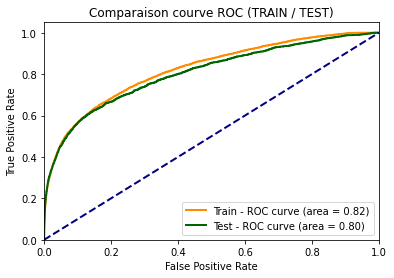

In [26]:
# Creation des courbes ROC
from sklearn.metrics import roc_curve, auc
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_predict_proba)
roc_auc_train = auc(fpr_train, tpr_train)
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_predict_proba)
roc_auc_test = auc(fpr_test, tpr_test)

# Représentation graphique / courbe ROC
import matplotlib.pyplot as plt
plt.figure()
lw = 2
plt.plot(fpr_train, tpr_train, color='darkorange',
         lw=lw, label='Train - ROC curve (area = %0.2f)' % roc_auc_train)

plt.plot(fpr_test, tpr_test, color='darkgreen',
         lw=lw, label='Test - ROC curve (area = %0.2f)' % roc_auc_test)

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Comparaison courve ROC (TRAIN / TEST)')
plt.legend(loc="lower right")
plt.show()

In [27]:
import pandas as pd
import numpy as np
from statsmodels.discrete.discrete_model import Logit

# Assurez-vous que X_train_norm et X_test_norm sont des DataFrames Pandas
X_train_norm = pd.DataFrame(X_train_norm)
X_test_norm = pd.DataFrame(X_test_norm)

# Ajoutez une colonne constante pour l'intercept
X_train_norm["const"] = 1
X_test_norm["const"] = 1

# Convertissez toutes les colonnes en types flottants
X_train_norm = X_train_norm.astype(float)
X_test_norm = X_test_norm.astype(float)

# Assurez-vous que y_train est un Series Pandas
y_train = pd.DataFrame(y_train)
y_train = y_train.reset_index(drop=True)

In [ ]:
#Selection des variables avec une pvalue <=0.05
var_train_reg = table_pvalue[table_pvalue["pvalue"]<0.05].index.values.tolist()
print(var_train_reg)

In [ ]:
lr = Logit(endog=y_train,exog=X_train_norm[var_train_reg].astype(float))

reg = lr.fit()
print(reg.summary())

In [ ]:
# Creation des courbes ROC
from sklearn.metrics import roc_curve, auc
fpr_train, tpr_train, _ = roc_curve(y_train, reg.predict(X_train_norm[var_train_reg].astype(float)))
roc_auc_train = auc(fpr_train, tpr_train)
fpr_test, tpr_test, _ = roc_curve(y_test, reg.predict(X_test_norm[var_train_reg].astype(float)))
roc_auc_test = auc(fpr_test, tpr_test)

# Représentation graphique / courbe ROC
import matplotlib.pyplot as plt
plt.figure()
lw = 2
plt.plot(fpr_train, tpr_train, color='darkorange',
         lw=lw, label='Train - ROC curve (area = %0.2f)' % roc_auc_train)

plt.plot(fpr_test, tpr_test, color='darkgreen',
         lw=lw, label='Test - ROC curve (area = %0.2f)' % roc_auc_test)

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Comparaison courve ROC (TRAIN / TEST)')
plt.legend(loc="lower right")
plt.show()



In [ ]:
reg_log = LogisticRegression(fit_intercept=True) # Pas d'intercept parce qu'il n'a pas été conservé précédement


del X_train_norm["const"]
del X_test_norm["const"]
if "const" in var_train_reg : 
    var_train_reg.remove("const")
    
reg_log.fit(X_train_norm[var_train_reg],y_train)
y_train_predict_proba = reg_log.predict_proba(X_train_norm[var_train_reg])[:,1]
y_test_predict_proba = reg_log.predict_proba(X_test_norm[var_train_reg])[:,1]

table_coeff = pd.DataFrame()
table_coeff["Variable"]=var_train_reg
table_coeff["Coefficient"] = reg_log.coef_[0]
print(table_coeff)

print("Intercept : " + str(reg_log.intercept_))


In [ ]:
table_coeff["Val_ABS_Coefficient"]=abs(table_coeff["Coefficient"])
table_coeff.sort_values(by =["Val_ABS_Coefficient"], inplace = True, ascending=False)
table_coeff.head(5)

In [ ]:
# Creation des courbes ROC
from sklearn.metrics import roc_curve, auc
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_predict_proba)
roc_auc_train = auc(fpr_train, tpr_train)
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_predict_proba)
roc_auc_test = auc(fpr_test, tpr_test)

# Représentation graphique / courbe ROC
import matplotlib.pyplot as plt
plt.figure()
lw = 2
plt.plot(fpr_train, tpr_train, color='darkorange',
         lw=lw, label='Train - ROC curve (area = %0.2f)' % roc_auc_train)

plt.plot(fpr_test, tpr_test, color='darkgreen',
         lw=lw, label='Test - ROC curve (area = %0.2f)' % roc_auc_test)

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Comparaison courve ROC (TRAIN / TEST)')
plt.legend(loc="lower right")
plt.show()

## III-   